# **Build a Model that Classifies the Side Effects of a Drug **

In [3]:
##importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
##test data set fro kaggle
df = pd.read_csv('/content/drive/MyDrive/drugsComTest_raw.csv')

In [6]:
##trian data set from kaggle
df1 = pd.read_csv('/content/drive/MyDrive/drugsComTrain_raw.csv')

In [7]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
##joining test and train dataset
df = pd.concat([df,df1])

In [9]:
##dropping the review column
df.drop('review',axis = 1,inplace = True)

In [10]:
##shape of new dataset
df.shape

(215063, 6)

In [11]:
##dropping duplicate values
new_df = df.drop_duplicates()


In [12]:
import random

In [13]:
!pip install Faker
import faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.5 MB/s eta 0:00:00


In [14]:
from faker import Faker

fake = Faker()

np.random.seed(123)
random.seed(123) # setting seed for faker library


In [15]:
new_df.shape

(215063, 6)

In [16]:
new_df.head()

,uniqueID,drugName,condition,rating,date,usefulCount
0,163740,Mirtazapine,Depression,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4


In [17]:
##no of rows needed to  add make it 400000
new_rows = 400000 - df.shape[0]
new_data = []

In [18]:
# Set a random seed
np.random.seed(123)
for _ in range(new_rows):
    random_entry = df.sample()
    new_entry = random_entry.copy()


    new_entry['uniqueID'] += 1
    new_entry['rating'] = np.random.randint(1, 10)
    new_entry['usefulCount'] = np.random.randint(1, 50)

    new_data.append(new_entry)

new_df = pd.concat([df] + new_data, ignore_index=True)

print(f"New dataframe shape: {new_df.shape}")
print(new_df.head())

New dataframe shape: (400000, 6)
   uniqueID         drugName                     condition  rating       date  \
0    163740      Mirtazapine                    Depression      10  28-Feb-12   
1    206473       Mesalamine  Crohn's Disease, Maintenance       8  17-May-09   
2    159672          Bactrim       Urinary Tract Infection       9  29-Sep-17   
3     39293         Contrave                   Weight Loss       9   5-Mar-17   
4     97768  Cyclafem 1 / 35                 Birth Control       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4  
New dataframe shape: (400000, 6)
   uniqueID         drugName                     condition  rating       date  \
0    163740      Mirtazapine                    Depression      10  28-Feb-12   
1    206473       Mesalamine  Crohn's Disease, Maintenance       8  17-May-09   
2    159672          Bactrim       Urinary Tract Infection       9  29-Sep-17   
3     39293         C

In [ ]:
new_df.shape

In [ ]:
#drop duplicate values
new_df.drop_duplicates(inplace = True)

In [ ]:
new_df.shape

(399819, 6)

In [22]:
new_df.shape

(399819, 6)

In [23]:
new_df.tail()

,uniqueID,drugName,condition,rating,date,usefulCount
399995,139970,Euflexxa,Osteoarthritis,1,14-Jul-10,12
399996,151195,OxyContin,Pain,7,7-Jan-10,16
399997,26115,Sprintec,Birth Control,4,17-Jan-17,42
399998,170693,Quetiapine,Depression,8,20-Nov-13,39
399999,105753,Methylprednisolone,Inflammatory Conditions,2,19-Oct-13,40


In [ ]:
## creating age column by adding random values between 18 - 81
np.random.seed(123)

ages = np.random.randint(low=18, high=81, size=len(new_df))
age = pd.DataFrame({'Age': ages})

In [120]:
## creating names using faker library
np.random.seed(123)
fake_names = []
for _ in range(len(new_df)):
    fake_names.append(fake.name())

In [121]:
names = pd.DataFrame({'Name': fake_names})

In [122]:
## creating side effects column
np.random.seed(123)
# Define the side effects
side_effects = ['Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects',
                'Mild Side Effects', 'No Side Effects']

# Define the desired distribution of side effects (weights)
weights = [0.22, 0.28, 0.13, 0.2, 0.17]  # Example weights, adjust as needed

# Generate imbalanced side effects column
side_effects_column =np.random.choice(side_effects,size = len(new_df) ,p=weights)


In [123]:
side_effect= pd.DataFrame({'Side effects': side_effects_column})


In [124]:
np.random.seed(123)
# Define the races
races = ["Asian", "African", "White", "Hispanic", "Mixed"]
weights = [0.28, 0.15, 0.12, 0.25, 0.2]
race_column = np.random.choice(races,size = len(new_df) ,p=weights)



In [125]:
race= pd.DataFrame({'Race': race_column})

In [126]:
np.random.seed(123)
# Generate fake gender data
# Generate fake gender data
weights = [0.65, 0.35]
genders = random.choices(['Male', 'Female'], weights=weights, k=len(new_df))

gender = pd.DataFrame({'Gender': genders})

In [127]:
df_new = pd.concat([gender,race,side_effect,names,age],axis=1)

In [128]:
df_new.shape

(399819, 5)

In [129]:
new_df.shape

(399819, 6)

In [130]:
df_new.head()

,Gender,Race,Side effects,Name,Age
0,Female,Hispanic,Mild Side Effects,Edward Baker,80
1,Male,African,Severe Side Effects,Darryl Avila,63
2,Male,Asian,Severe Side Effects,Kelly Rose,80
3,Male,Hispanic,Extremely Severe Side Effects,Zachary Brown,20
4,Female,Hispanic,Mild Side Effects,Taylor Figueroa,46


In [131]:
df_new = df_new.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)

In [132]:
##concatanating first dataframe with new one
data = pd.concat([new_df,df_new],axis=1)

In [133]:
data.shape

(399819, 11)

In [134]:
data.drop_duplicates(inplace =True)

In [135]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'rating', 'date', 'usefulCount',
       'Gender', 'Race', 'Side effects', 'Name', 'Age'],
      dtype='object')

In [136]:
column_order = ['uniqueID','Name', 'Gender','Age','Race','drugName','condition','rating', 'date','usefulCount','Side effects']

In [137]:
data = data[column_order]

In [138]:
data.isna().sum()

uniqueID           0
Name               0
Gender             0
Age                0
Race               0
drugName           0
condition       2298
rating             0
date               0
usefulCount        0
Side effects       0
dtype: int64

In [139]:
# Descriptive status of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,399819.0,116037.183553,66968.215158,0.0,58167.0,115909.0,173852.5,232291.0
Age,399819.0,48.972563,18.181783,18.0,33.0,49.0,65.0,80.0
rating,399819.0,6.073458,3.135697,1.0,3.0,7.0,9.0,10.0
usefulCount,399819.0,26.602805,28.373669,0.0,8.0,21.0,37.0,1291.0


In [140]:
# Descriptive status of categorical columns
data.describe(include = 'object').T

,count,unique,top,freq
Name,399819,192626,Michael Smith,183
Gender,399819,2,Male,259613
Race,399819,5,Asian,112149
drugName,399819,3671,Levonorgestrel,9187
condition,397521,916,Birth Control,71639
date,399819,3579,27-Jan-16,368
Side effects,399819,5,Severe Side Effects,111882


In [141]:
# Checking for misssing values
data.isna().sum()

uniqueID           0
Name               0
Gender             0
Age                0
Race               0
drugName           0
condition       2298
rating             0
date               0
usefulCount        0
Side effects       0
dtype: int64

In [142]:
##data that has null values for condition
data[data['condition'].isnull()]

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
34,77164,Joy Brown,Male,20,African,Lorcaserin,NaN,5,27-May-14,21,Severe Side Effects
146,192374,James Roberts,Male,19,Hispanic,Drospirenone / ethinyl estradiol,NaN,4,13-Apr-15,8,Mild Side Effects
156,165767,Monica Franklin,Male,77,Hispanic,Levonorgestrel,NaN,7,3-Apr-17,0,Mild Side Effects
779,157589,Cory Lee,Male,50,Mixed,Guaifenesin,NaN,9,23-Feb-10,10,No Side Effects
1017,96918,Tyler Patel,Male,65,White,Conjugated estrogens / medroxyprogesterone,NaN,1,6-Jul-15,5,Severe Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399197,195259,Jessica Stone,Male,71,Hispanic,Dutasteride / tamsulosin,NaN,6,1-Mar-13,18,Mild Side Effects
399304,104876,Andre Porter,Male,56,Mixed,Ethinyl estradiol / levonorgestrel,NaN,3,27-Jan-10,43,No Side Effects
399328,200096,Jackie Calhoun,Male,35,Hispanic,Varenicline,NaN,9,31-Aug-15,8,Mild Side Effects
399594,206487,Christopher Fields,Male,38,Asian,Mesalamine,NaN,4,8-Oct-08,34,Moderate Side Effects


# **Univariate Analysis**

In [143]:
data1 = data.copy()

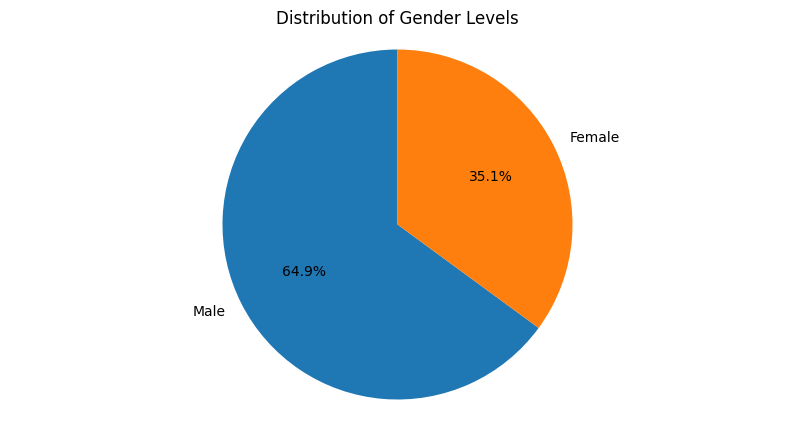

In [144]:
# Univariate analysis of gender
gen_count=data['Gender'].value_counts()
gen_count

fig,ax=plt.subplots(figsize=(10,5))
ax.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Gender Levels")
ax.axis("equal")
plt.show()

Here no of males exceed no of females

In [145]:
data['drugName'].value_counts()


Levonorgestrel                       9187
Etonogestrel                         8192
Ethinyl estradiol / norethindrone    6915
Nexplanon                            5374
Ethinyl estradiol / norgestimate     5150
                                     ... 
Polocaine                               1
Cubicin                                 1
Demadex                                 1
Imiglucerase                            1
Grifulvin V                             1
Name: drugName, Length: 3671, dtype: int64

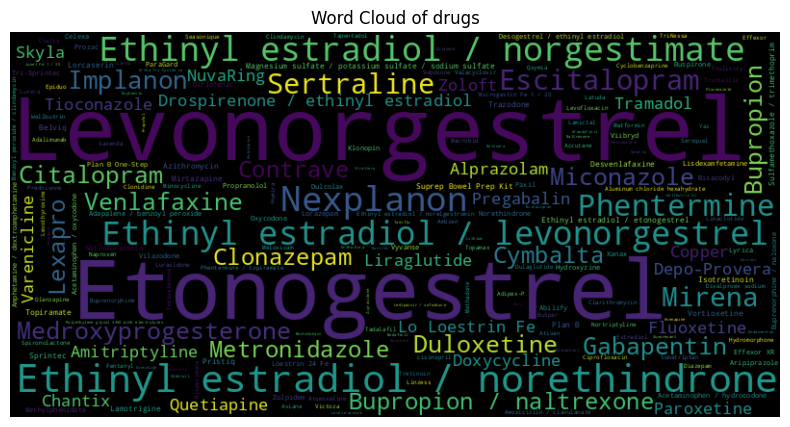

In [146]:
# Univariate analysis of drugname using Word Cloud


from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(data['drugName'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of drugs')
plt.show()

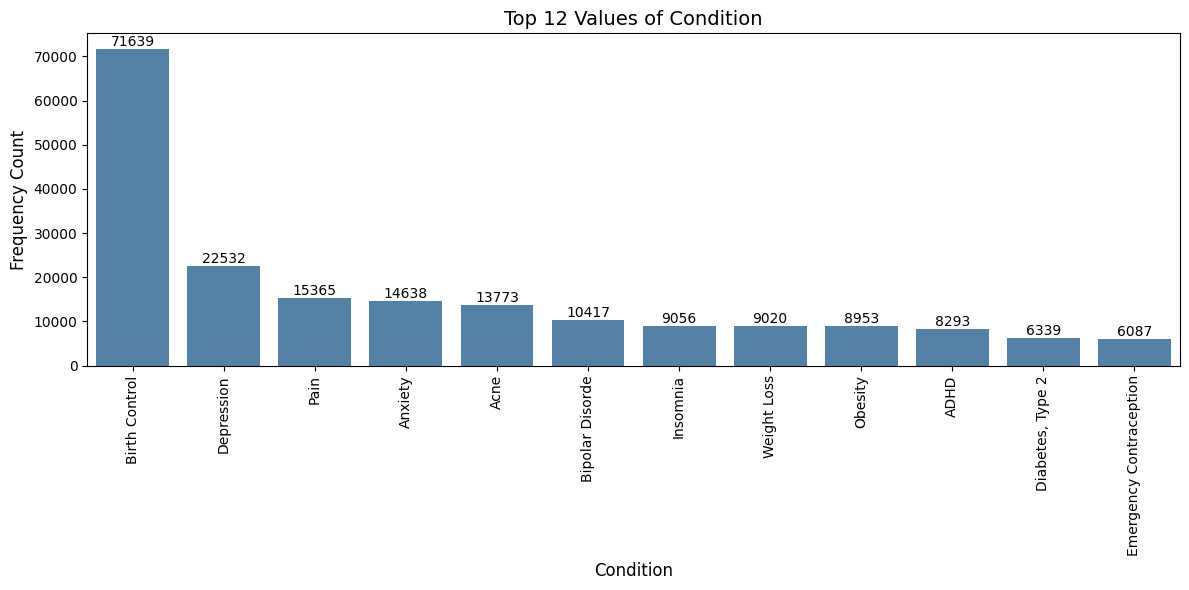

In [147]:
# top 12 values of condition plot

condition_counts = data['condition'].value_counts()
top_12_values = condition_counts.nlargest(12)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_12_values.index, y=top_12_values.values, color='steelblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Frequency Count', fontsize=12)
plt.title('Top 12 Values of Condition', fontsize=14)

# Display total count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=10)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(-1.099999075418466,
 1.0999993601361826,
 -1.0999995234375641,
 1.0999999773065507)

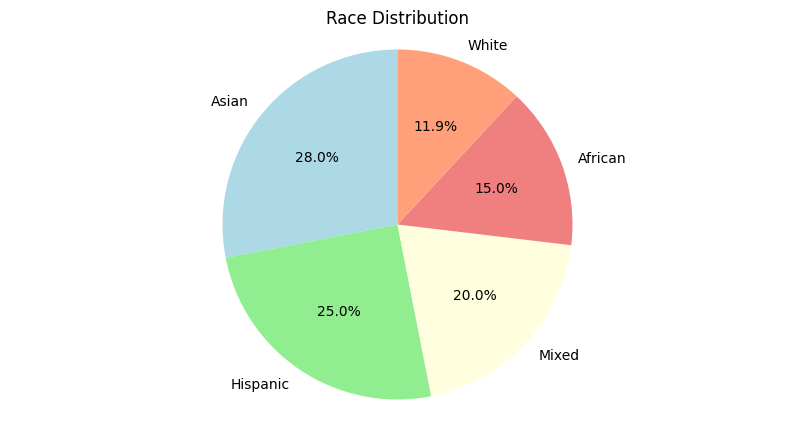

In [148]:
# Univariate analysis of Race

# Calculate the frequency count for each race level
race_counts = data['Race'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 5))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightsalmon'])
plt.title('Race Distribution')
plt.axis('equal')

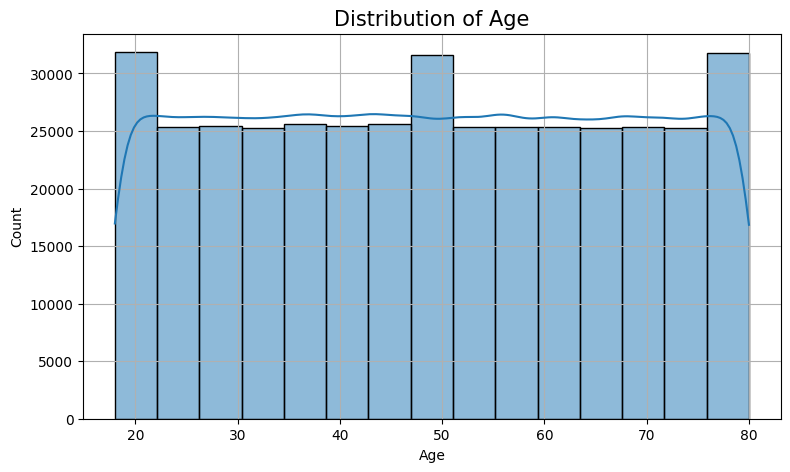

In [149]:
#Univariate analysis of Age
plt.figure(figsize=(9, 5))
sns.histplot(data['Age'],bins = 15, kde=True)
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Age')
plt.grid()
plt.show()

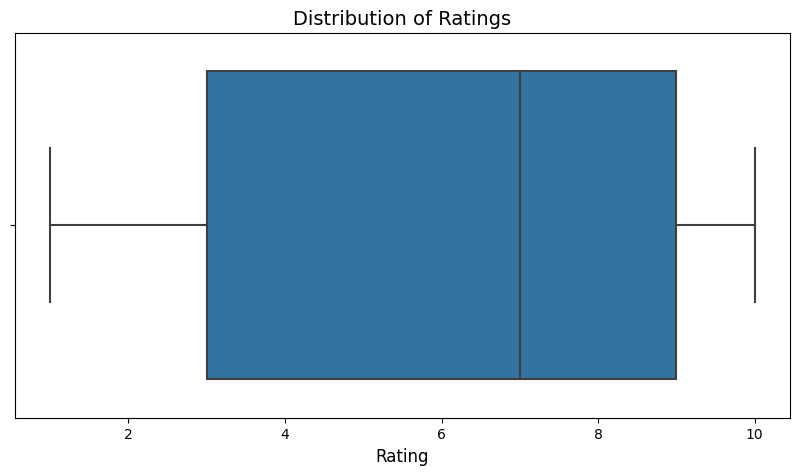

In [150]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="rating")
plt.xlabel("Rating", fontsize=12)
plt.title("Distribution of Ratings", fontsize=14)
plt.show()

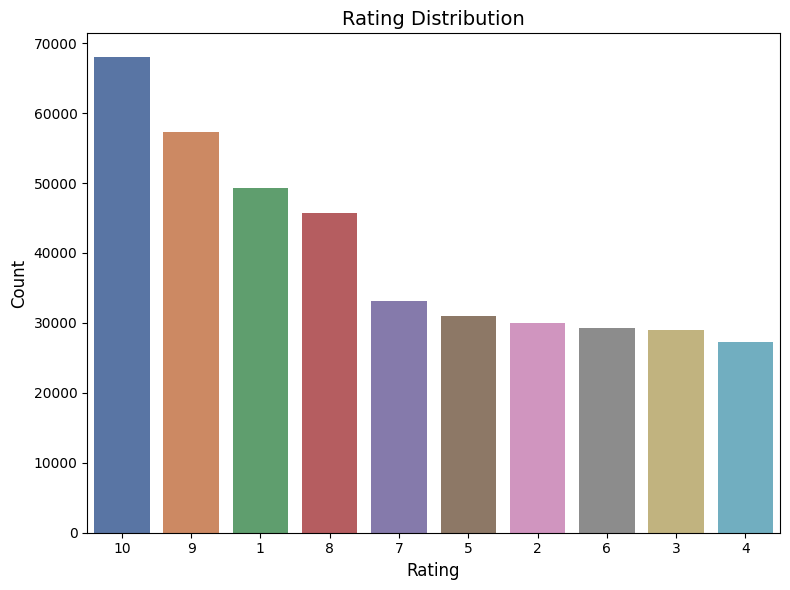

In [151]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='rating', palette='deep',order=data['rating'].value_counts().index)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Rating Distribution', fontsize=14)
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

The aim is to compare the age with the Side effects column to identify if any relationships exist. For the purpose the age column is divided into 4bins (categories) :-

Young - Less than 25 years

Middle - 25 to 40 years

Senior - 40 to 50 years

Elder - 50 years or older

In [152]:
data1['Age'] = pd.cut(data1['Age'],bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])


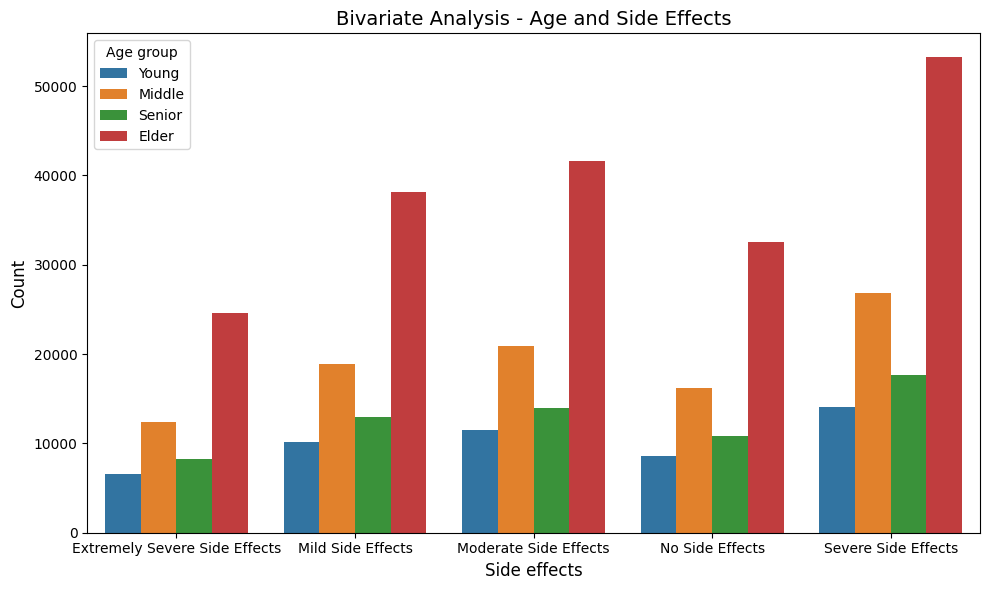

In [153]:
# Grouping by 'Age' and 'Side Effects' and calculating the count
bivariate_data = data1.groupby(['Side effects','Age']).size().reset_index(name='Count')

# Plotting the bivariate analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=bivariate_data, x='Side effects', y='Count', hue='Age')
plt.xlabel('Side effects', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bivariate Analysis - Age and Side Effects', fontsize=14)
plt.legend(title='Age group')
plt.tight_layout()
plt.show()

Side effects are more seen in elder community compared to other age groups


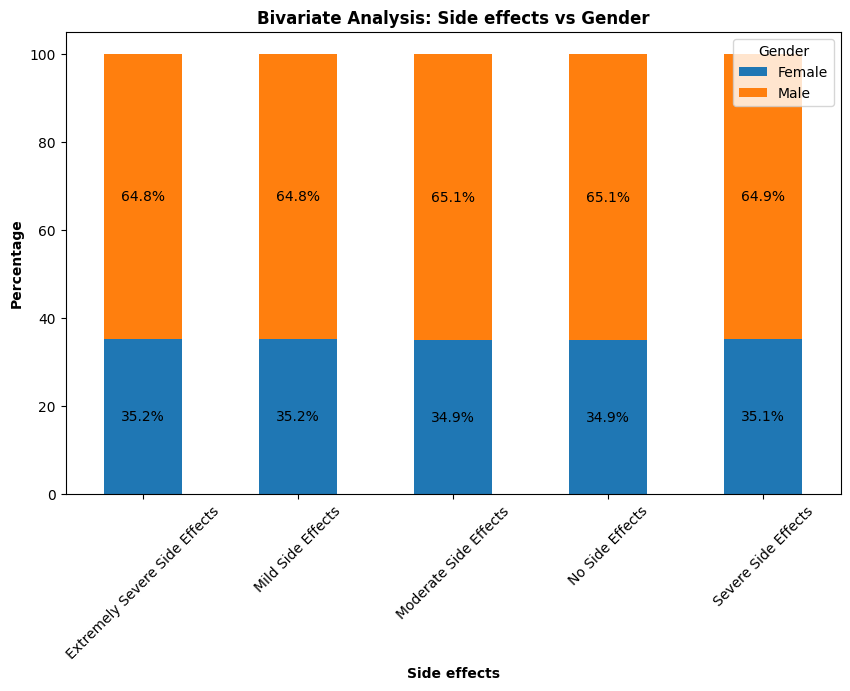

In [154]:
# Crosstabulation for bivariate analysis
bivariate_table = pd.crosstab(index=data['Side effects'], columns=data['Gender'], normalize='index') * 100

# Plotting a stacked bar chart to show the percentage
ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Bivariate Analysis: Side effects vs Gender', fontweight='bold')
plt.xlabel('Side effects', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Adding percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

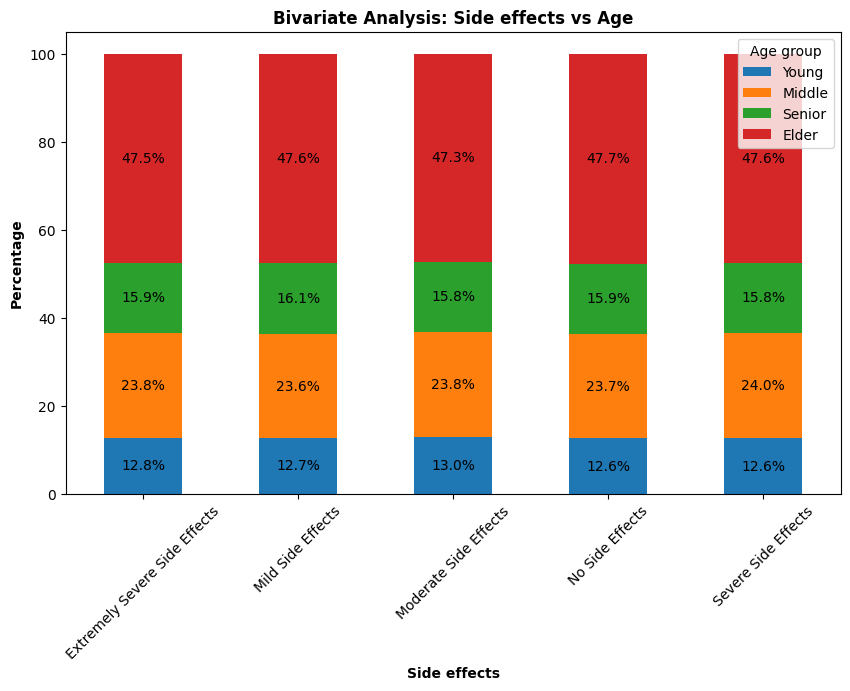

In [155]:
# Crosstabulation for bivariate analysis
bivariate_table = pd.crosstab(index=data1['Side effects'], columns=data1['Age'], normalize='index') * 100

# Plotting a stacked bar chart to show the percentage
ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Bivariate Analysis: Side effects vs Age', fontweight='bold')
plt.xlabel('Side effects', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Age group')

# Adding percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

In [156]:
## function for bivariate analysis
def bivariate_analysis(data, column):
    bivariate_table = pd.crosstab(index=data['Side effects'], columns=data[column], normalize='index') * 100

    ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f"Bivariate Analysis: Side effects vs {column}", fontweight="bold")
    plt.xlabel(f'{column}', fontweight="bold")
    plt.ylabel("Percentage", fontweight="bold")
    plt.xticks(rotation=45)
    plt.legend(title=f'{column}')

    # Adding percentage labels inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f"{height:.1f}%", (x + width / 2, y + height / 2), ha='center', va='center')


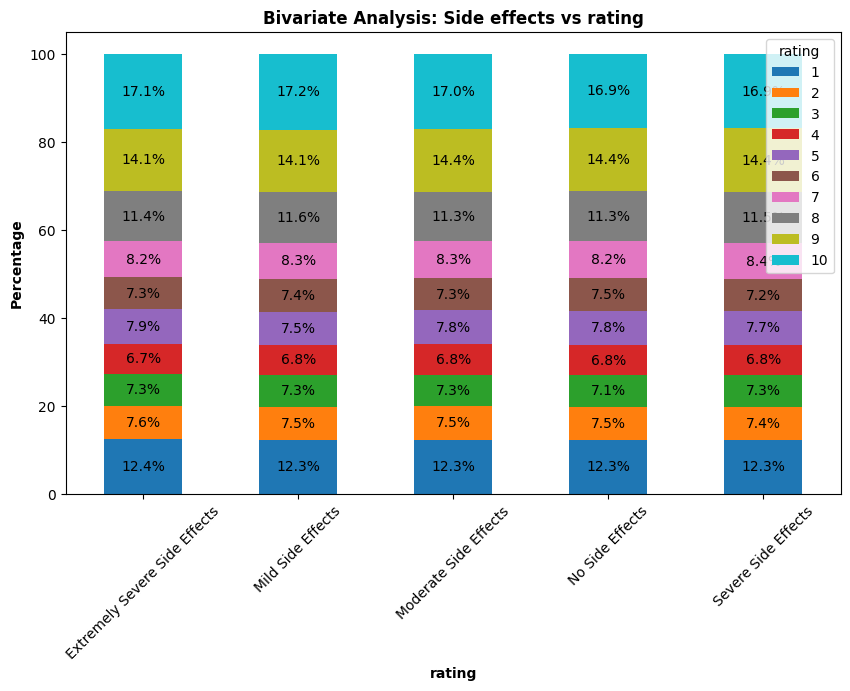

In [157]:
bivariate_analysis(data,'rating')

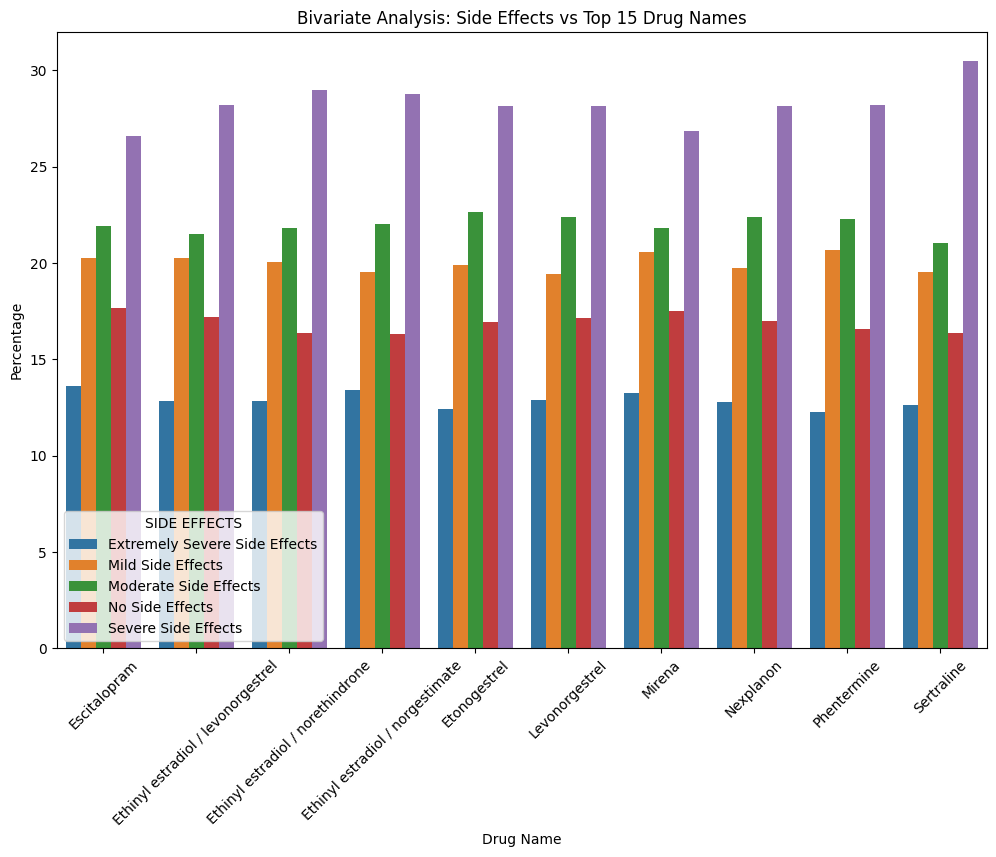

In [158]:
# Step 1: Get top drug names
top_drug_names = data['drugName'].value_counts().nlargest(10).index

# Step 2: Filter the dataframe based on top drug names
filtered_data = data[data['drugName'].isin(top_drug_names)]

# Step 3: Cross-tabulation of side effects and filtered drug names
cross_tab = pd.crosstab(filtered_data['drugName'], filtered_data['Side effects'])

# Normalize the cross-tabulation table along the columns
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Reset index for Seaborn compatibility
cross_tab_normalized = cross_tab_normalized.reset_index()

# Melt the DataFrame for easier plotting
melted_data = pd.melt(cross_tab_normalized, id_vars='drugName', var_name='Side Effect', value_name='Percentage')

# Plot the grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='drugName', y='Percentage', hue='Side Effect', data=melted_data)
plt.xlabel('Drug Name')
plt.ylabel('Percentage')
plt.title('Bivariate Analysis: Side Effects vs Top 15 Drug Names')
plt.xticks(rotation=45)
plt.legend(title='SIDE EFFECTS', loc='lower left')
# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



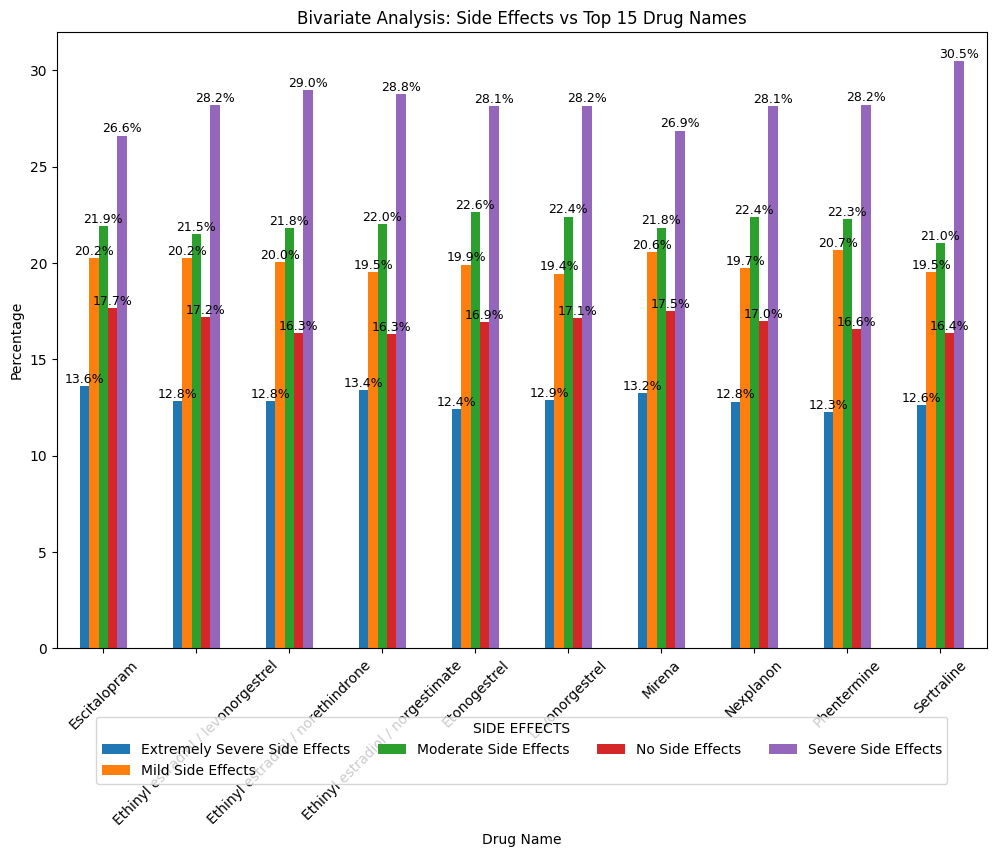

In [159]:
# Step 1: Get top drug names
top_drug_names = data['drugName'].value_counts().nlargest(10).index

# Step 2: Filter the dataframe based on top drug names
filtered_data = data[data['drugName'].isin(top_drug_names)]

# Step 3: Cross-tabulation of side effects and filtered drug names
cross_tab = pd.crosstab(filtered_data['drugName'], filtered_data['Side effects'])

# Normalize the cross-tabulation table along the columns
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart with percentage labels
ax = cross_tab_normalized.plot(kind='bar', figsize=(12, 8))
ax.set_xlabel('Drug Name')
ax.set_ylabel('Percentage')
ax.set_title('Bivariate Analysis: Side Effects vs Top 15 Drug Names')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Change the legend position
plt.legend(title='SIDE EFFECTS', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.xticks(rotation=45)
plt.show()

<ipython-input-160-bc7dd6abb232>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()
<ipython-input-160-bc7dd6abb232>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)


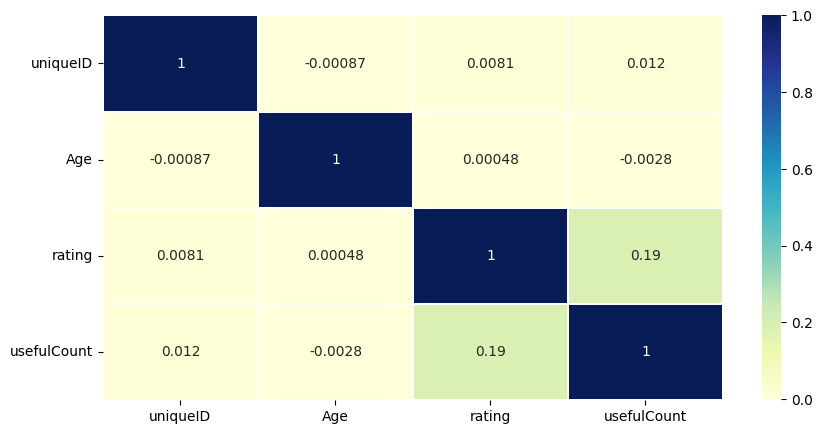

In [160]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [161]:
!pip install Buffer


# **Pre Processing**

## Null Value Handling

In [162]:
# identifying null values
data.isna().mean()*100

uniqueID        0.00000
Name            0.00000
Gender          0.00000
Age             0.00000
Race            0.00000
drugName        0.00000
condition       0.57476
rating          0.00000
date            0.00000
usefulCount     0.00000
Side effects    0.00000
dtype: float64

In [163]:
## creating Dataframe for null values analysis of previous year rating
rating_null = data[data['condition'].isna()]
rating_null

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
34,77164,Joy Brown,Male,20,African,Lorcaserin,NaN,5,27-May-14,21,Severe Side Effects
146,192374,James Roberts,Male,19,Hispanic,Drospirenone / ethinyl estradiol,NaN,4,13-Apr-15,8,Mild Side Effects
156,165767,Monica Franklin,Male,77,Hispanic,Levonorgestrel,NaN,7,3-Apr-17,0,Mild Side Effects
779,157589,Cory Lee,Male,50,Mixed,Guaifenesin,NaN,9,23-Feb-10,10,No Side Effects
1017,96918,Tyler Patel,Male,65,White,Conjugated estrogens / medroxyprogesterone,NaN,1,6-Jul-15,5,Severe Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399197,195259,Jessica Stone,Male,71,Hispanic,Dutasteride / tamsulosin,NaN,6,1-Mar-13,18,Mild Side Effects
399304,104876,Andre Porter,Male,56,Mixed,Ethinyl estradiol / levonorgestrel,NaN,3,27-Jan-10,43,No Side Effects
399328,200096,Jackie Calhoun,Male,35,Hispanic,Varenicline,NaN,9,31-Aug-15,8,Mild Side Effects
399594,206487,Christopher Fields,Male,38,Asian,Mesalamine,NaN,4,8-Oct-08,34,Moderate Side Effects


### *Filling null values in column 'condition' with respect to the column 'drugName'*

In [164]:
data['condition'] = data.groupby('drugName')['condition'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [165]:
# identifying null values
data.isna().mean()*100

uniqueID        0.0
Name            0.0
Gender          0.0
Age             0.0
Race            0.0
drugName        0.0
condition       0.0
rating          0.0
date            0.0
usefulCount     0.0
Side effects    0.0
dtype: float64

# **Outlier Detection**

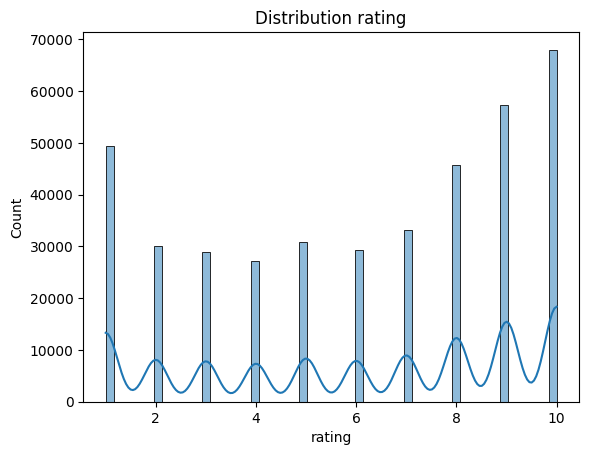

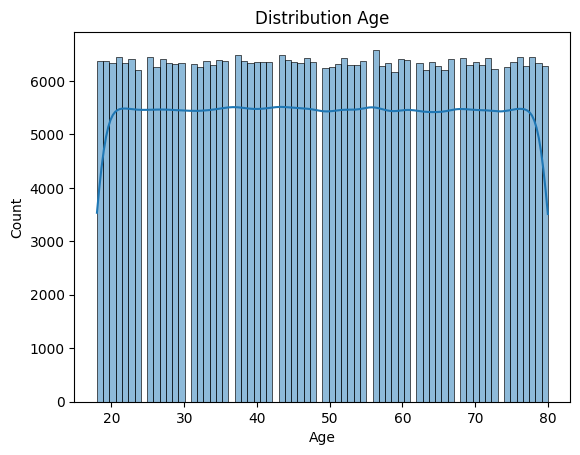

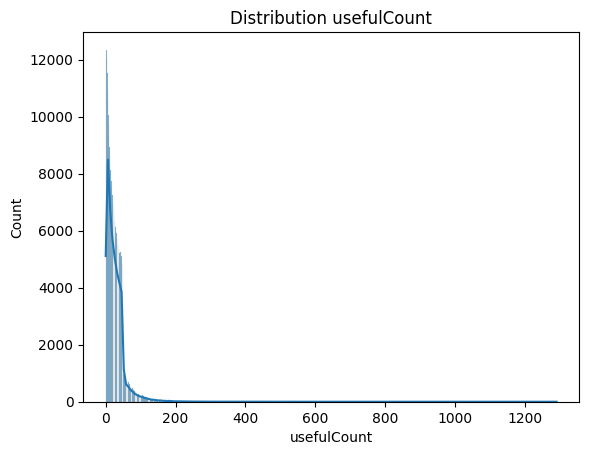

In [166]:
# checking distribution of columns
columns =['rating',  'Age', 'usefulCount']
for feature in columns:

    data2 = data.copy()
    sns.histplot(data2[feature],kde=True)

    plt.xlabel(feature)
    plt.title('Distribution ' + feature)
    plt.show()

In [167]:
# checking skewness of column
print('Age Skewness: ',data['Age'].skew())
print('rating Skewness: ',data['rating'].skew())
print('usefulcount ',df['usefulCount'].skew())

Age Skewness:  0.0023779599892745935
rating Skewness:  -0.2992945327460599
usefulcount  4.495157174935215


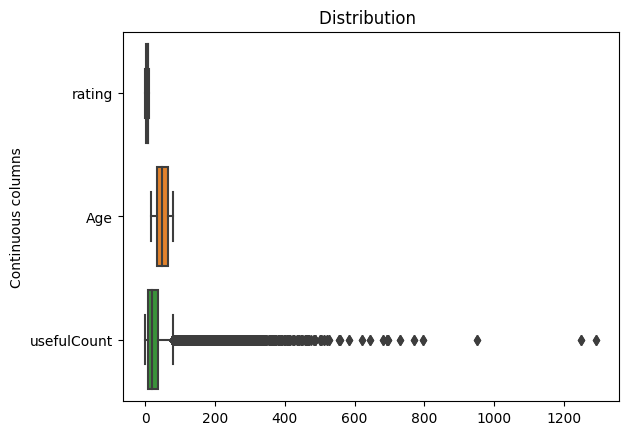

In [168]:
## Box Plot to Identify Outlier columns
sns.boxplot(data[['rating',  'Age', 'usefulCount']],orient='h')

plt.ylabel('Continuous columns')
plt.title('Distribution ')
plt.show()

Usefulcount column has outlier values

In [169]:
## describtive statiscs to find mean,std,min,max,25 percentile,50 percentile,75percentile
data[['usefulCount']].describe()

,usefulCount
count,399819.000000
mean,26.602805
std,28.373669
min,0.000000
25%,8.000000
50%,21.000000
75%,37.000000
max,1291.000000


In [170]:
### 25 percentile
percentile25 = data['usefulCount'].quantile(0.25)

### 75 percentile
percentile75 = data['usefulCount'].quantile(0.75)

### Finding IQR
IQR_usefulcount = percentile75-percentile25


In [171]:
## Upper and lower limit of usefulcount
upper = percentile75+1.5*IQR_usefulcount
lower = percentile25-1.5*IQR_usefulcount

In [172]:
## copying outliers from  datafram to new dataframe
usefulcount_out = data[(data['usefulCount']<lower)|(data['usefulCount']>upper)]

In [173]:
print('percent ofoutlier in data : ',len(usefulcount_out)/len(data)*100)

percent ofoutlier in data :  3.8004697125449267


In [174]:
usefulcount_out.shape

(15195, 11)

In [175]:
#using log transforamtion to treat the outlier
usefulcount_out['usefulCount'] = np.log(usefulcount_out['usefulCount'])

<ipython-input-175-e4ad315749aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usefulcount_out['usefulCount'] = np.log(usefulcount_out['usefulCount'])


In [176]:
a=list(data.drugName.unique())

In [177]:

# create a list of elements form the drugname which are similar and identical
#in name and function but due to slight variation in name it is identified as new drug

c=pd.DataFrame(a,columns=['Medicine Name']).astype(str)
k=c[c['Medicine Name'].str.contains('/')==False]
#k=c
t=[]
for n in k['Medicine Name']:
    n=n+' '
    l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
    c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
    k=k.drop(index=c)
    n=n[:-1]
    l.insert(0,n)
    o=len(l)
    if (o>=2):
        t.append(l)

# exmample
#['Afrin','Afrin 4 Hour Extra Moisturizing','Afrin NoDrip Sinus','Afrin Original]
#['Calan', 'Calan SR']

<ipython-input-177-531595f12561>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
<ipython-input-177-531595f12561>:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
<ipython-input-177-531595f12561>:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
<ipython-input-177-531595f12561>:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
<ipython-input-177-531595f12561>:10: UserWarning: This pattern is in

In [178]:
t

[['Bactrim', 'Bactrim DS'],
 ['Methadone', 'Methadone Diskets'],
 ['Belviq', 'Belviq XR'],
 ['Seroquel', 'Seroquel XR'],
 ['Ambien', 'Ambien CR'],
 ['Klonopin', 'Klonopin Wafer'],
 ['Gabapentin', 'Gabapentin enacarbil'],
 ['Wellbutrin', 'Wellbutrin XL', 'Wellbutrin SR'],
 ['Ultram', 'Ultram ER', 'Ultram ODT'],
 ['Inderal', 'Inderal LA'],
 ['Promethazine', 'Promethazine DM'],
 ['Depakote', 'Depakote ER', 'Depakote Sprinkles'],
 ['Prozac', 'Prozac Weekly'],
 ['Depo-Provera', 'Depo-Provera Contraceptive'],
 ['Desyrel', 'Desyrel Dividose'],
 ['Metoprolol', 'Metoprolol Tartrate'],
 ['Diazepam', 'Diazepam Intensol'],
 ['Estradiol', 'Estradiol Patch'],
 ['Augmentin', 'Augmentin XR', 'Augmentin ES-600'],
 ['Zofran', 'Zofran ODT'],
 ['Paxil', 'Paxil CR'],
 ['Xanax', 'Xanax XR'],
 ['Nexium', 'Nexium IV', 'Nexium 24HR'],
 ['Azithromycin', 'Azithromycin Dose Pack'],
 ['Sinemet', 'Sinemet CR'],
 ['Fentanyl', 'Fentanyl Transdermal System'],
 ['Abilify', 'Abilify Discmelt', 'Abilify Maintena'],
 ['Re

In [179]:
for i in t:
    data.loc[data['drugName'].isin(i),'drugName']=i[0]

# replacing the name of the drugs with slight varition to indentical name in the present in the list
# example replacing 'Zyrtec-D 12 Hour' with Zyrtec-D
# example replacing 'Tylenol 8 Hour','Tylenol Allergy Multi-Symptom Nighttime','Tylenol Arthritis Pain' with Tylenol

In [180]:
data['drugName'].nunique()

3389

# **Encoding**

In [181]:
!pip install category_encoders


In [182]:
data

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
0,163740,Edward Baker,Female,80,Hispanic,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects
1,206473,Darryl Avila,Male,63,African,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects
2,159672,Kelly Rose,Male,80,Asian,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects
3,39293,Zachary Brown,Male,20,Hispanic,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects
4,97768,Taylor Figueroa,Female,46,Hispanic,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399814,139970,Brian Morales,Male,50,Mixed,Euflexxa,Osteoarthritis,1,14-Jul-10,12,Mild Side Effects
399815,151195,Nicole Hawkins,Male,32,Hispanic,OxyContin,Pain,7,7-Jan-10,16,Extremely Severe Side Effects
399816,26115,Shawn White,Female,60,African,Sprintec,Birth Control,4,17-Jan-17,42,Severe Side Effects
399817,170693,John Woods,Male,72,White,Quetiapine,Depression,8,20-Nov-13,39,Extremely Severe Side Effects


In [183]:
data['Side effects'].unique()

array(['Mild Side Effects', 'Severe Side Effects',
       'Extremely Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects'], dtype=object)

In [184]:
data.head()

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
0,163740,Edward Baker,Female,80,Hispanic,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects
1,206473,Darryl Avila,Male,63,African,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects
2,159672,Kelly Rose,Male,80,Asian,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects
3,39293,Zachary Brown,Male,20,Hispanic,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects
4,97768,Taylor Figueroa,Female,46,Hispanic,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects


In [185]:
##onehotencoding on Race column
from numpy import int32
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,dtype=int32,drop = 'first')

onehot_encoded = ohe.fit_transform(data[['Race','Gender']])

In [186]:
# create a new dataframe with encoded valuea

enc_data = pd.DataFrame(onehot_encoded,columns = ohe.get_feature_names_out(['Race','Gender']))

data = pd.concat([data, enc_data], axis=1)

data.drop(['Race','Gender'],axis=1,inplace=True)


In [187]:
data.head()

,uniqueID,Name,Age,drugName,condition,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male
0,163740,Edward Baker,80,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects,0,1,0,0,0
1,206473,Darryl Avila,63,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects,0,0,0,0,1
2,159672,Kelly Rose,80,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects,1,0,0,0,1
3,39293,Zachary Brown,20,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects,0,1,0,0,1
4,97768,Taylor Figueroa,46,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects,0,1,0,0,0


In [188]:
data.describe(include = object)

,Name,drugName,condition,date,Side effects
count,399819,399819,399819,399819,399819
unique,192626,3389,917,3579,5
top,Michael Smith,Levonorgestrel,Birth Control,27-Jan-16,Severe Side Effects
freq,183,9187,72678,368,111882


In [189]:
data['Side effects'].unique()

array(['Mild Side Effects', 'Severe Side Effects',
       'Extremely Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects'], dtype=object)

In [190]:
side_effect_mapping = {'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
                      }

data['Side effects'] = data['Side effects'].map(side_effect_mapping)

In [191]:
import category_encoders as ce

columns_to_encode = ['drugName','condition']

encoder = ce.TargetEncoder()

data_encoded = encoder.fit_transform(data[columns_to_encode], data['Side effects'])

In [192]:
data = data.drop(['drugName','condition'],axis =1)

In [193]:
data_encoded

,drugName,condition
0,1.956012,1.995100
1,2.004587,2.118609
2,1.997658,1.971095
3,1.958621,1.986282
4,2.173926,1.998775
...,...,...
399814,2.025641,1.991045
399815,2.049080,1.985422
399816,1.984802,1.998775
399817,1.997976,1.995100


In [194]:
data.head()

,uniqueID,Name,Age,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male
0,163740,Edward Baker,80,10,28-Feb-12,22,1,0,1,0,0,0
1,206473,Darryl Avila,63,8,17-May-09,17,3,0,0,0,0,1
2,159672,Kelly Rose,80,9,29-Sep-17,3,3,1,0,0,0,1
3,39293,Zachary Brown,20,9,5-Mar-17,35,4,0,1,0,0,1
4,97768,Taylor Figueroa,46,9,22-Oct-15,4,1,0,1,0,0,0


In [195]:
data_new = pd.concat([data,data_encoded],axis =1)

In [196]:
data_new.head()

,uniqueID,Name,Age,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male,drugName,condition
0,163740,Edward Baker,80,10,28-Feb-12,22,1,0,1,0,0,0,1.956012,1.995100
1,206473,Darryl Avila,63,8,17-May-09,17,3,0,0,0,0,1,2.004587,2.118609
2,159672,Kelly Rose,80,9,29-Sep-17,3,3,1,0,0,0,1,1.997658,1.971095
3,39293,Zachary Brown,20,9,5-Mar-17,35,4,0,1,0,0,1,1.958621,1.986282
4,97768,Taylor Figueroa,46,9,22-Oct-15,4,1,0,1,0,0,0,2.173926,1.998775


# **FEATURE REDUCTION**

In [197]:
data  = pd.DataFrame(data)

In [198]:
  data_new.drop(['uniqueID','Name','date'],axis = 1,inplace=True)

In [199]:

from sklearn.ensemble import RandomForestClassifier

x = data_new.drop('Side effects', axis=1)  # Features
y = data_new['Side effects']  # Target variable

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)

# Get feature importances
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)


               importance
Race_Mixed       0.195536
Race_Asian       0.183650
Race_Hispanic    0.183180
drugName         0.101157
usefulCount      0.094242
Age              0.087420
condition        0.075587
Race_White       0.040228
rating           0.034018
Gender_Male      0.004981


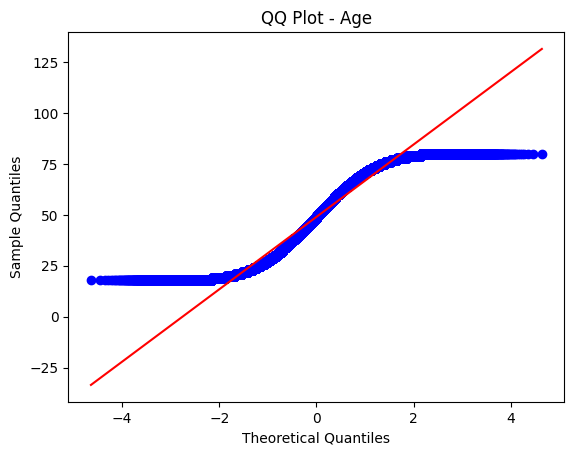

In [200]:
import scipy.stats as stats

# Extract the 'age' column from the DataFrame
age_column = data['Age']

# Generate the QQ plot
stats.probplot(age_column, dist="norm", plot=plt)
plt.title("QQ Plot - Age")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# FEATURE SCALING

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called 'data'
columns_to_scale = ['Age', 'rating', 'usefulCount']
scaler = MinMaxScaler()

# Perform min-max scaling on the specified columns
data_new[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [202]:
data_new.head()

,Age,rating,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male,drugName,condition
0,1.000000,1.000000,0.017041,1,0,1,0,0,0,1.956012,1.995100
1,0.725806,0.777778,0.013168,3,0,0,0,0,1,2.004587,2.118609
2,1.000000,0.888889,0.002324,3,1,0,0,0,1,1.997658,1.971095
3,0.032258,0.888889,0.027111,4,0,1,0,0,1,1.958621,1.986282
4,0.451613,0.888889,0.003098,1,0,1,0,0,0,2.173926,1.998775


In [203]:
## splitting the data set into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [204]:
## balancing the data using SMOTE
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [205]:
from collections import Counter

In [206]:
print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_sm).items())))


original dataset shape [(0, 45753), (1, 53638), (2, 58747), (3, 75131), (4, 34609)]
Resampled dataset shape [(0, 71924), (1, 65641), (2, 67954), (3, 64776), (4, 66138)]


<Axes: xlabel='Side effects', ylabel='count'>

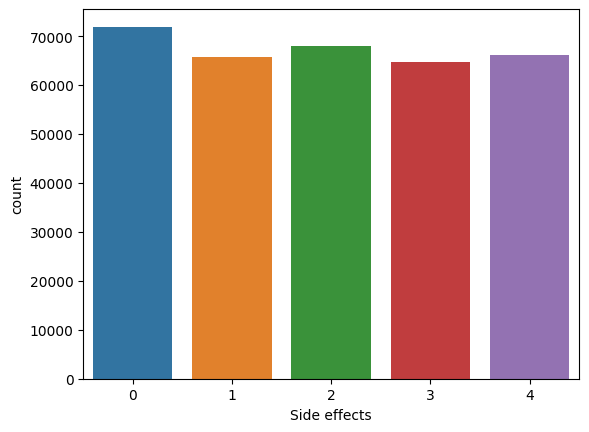

In [207]:
sns.countplot(x =y_train_sm)

# Model Training

In [208]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [209]:

models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs'),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_sm,y_train_sm)
    print(name+'  trained')

RandomForestClassifier  trained


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


## Model Evaluation

In [210]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average = 'macro'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average = 'macro'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average = 'macro'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Random Forest': array([[22326,    33,     0,     0,     0],
        [ 3929, 19385,     0,     0,  3213],
        [    0,     0, 28981,   132,     0],
        [    0,     3,  7959, 24005,  4784],
        [    0,  8959,     0,  3179,  5053]]),
 'Logistic regression': array([[22359,     0,     0,     0,     0],
        [ 3935, 22586,     0,     0,     6],
        [    0,     0, 29113,     0,     0],
        [    0,     4,  7995, 22685,  6067],
        [    0, 10637,     0,  2229,  4325]]),
 'KNN': array([[21095,   743,   116,   292,   113],
        [ 3910, 14911,   145,   372,  7189],
        [  231,   204, 26543,  2002,   133],
        [ 2215,  2040,  8974, 18002,  5520],
        [  200,  6997,   131,  3442,  6421]]),
 'DecisionTree': array([[19674,  2685,     0,     0,     0],
        [ 3457, 15560,     0,     0,  7510],
        [    0,     0, 24322,  4791,     0],
        [    0,   344,  6584, 24907,  4916],
        [    0,  7104,     0,  3589,  6498]]),
 'BernolliNB': array([[22359,

In [211]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.756020,0.717133,0.734373,0.716788
1,Logistic regression,0.766009,0.720727,0.744056,0.728224
2,KNN,0.659173,0.636555,0.656129,0.635816
3,DecisionTree,0.689407,0.668498,0.671526,0.666950
4,BernolliNB,0.779280,0.670520,0.726818,0.625830
5,GaussianNB,0.774869,0.684236,0.728414,0.701694
6,XGBClassifier,0.767017,0.715223,0.738247,0.720154


## Hyperparameter Tuning

In [212]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [213]:
#Hyperparameter tuning with RandomizedSearch and GridSearch

from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Define hyperparameters to tune and their respective search spaces
param_dist = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': np.arange(100, 1000, 100)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Perform the RandomizedSearchCV on your data
random_search.fit(x, y)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'max_iter': 100}
Best Accuracy: 0.7798853977993435


In [214]:
best_params = random_search.best_params_

In [215]:
best_params

{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 100}

In [216]:
param_grid = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'multi_class': ['multinomial'],
    'max_iter': [100]
}


In [217]:
from sklearn.model_selection import GridSearchCV


In [218]:
# Step 2: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model,
    param_grid=param_grid,scoring = 'accuracy',
    cv=5)


# Step 3: Fit the GridSearchCV object on your training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

In [ ]:
y_pred = best_logistic_model.predict(x_test)

#print("Best Parameters:", best_params)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average = 'macro'))
print('Recall = ',recall_score(y_test,y_pred,average = 'macro'))
print('F1 Score = ',f1_score(y_test,y_pred,average = 'macro'))

In [ ]:
grid_search.best_params_

In [222]:
logistic_model_best = LogisticRegression(max_iter=100, multi_class='multinomial', penalty='l2', solver='newton-cg')
logistic_model_best.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial', solver='newton-cg')

LogisticRegression(multi_class='multinomial', solver='newton-cg')

LogisticRegression(multi_class='multinomial', solver='newton-cg')

Logistic Regression model  found to be the suitable model for this classification problem